Una plataforma de ventas online nos contrata para que realicemos un modelo que nos<br> 
permita detectar un posible fraude dada cierta operación para ello contamos con un dataset<br> 
que contiene las siguientes columnas:<p>
(dataset: https://www.kaggle.com/datasets/rupakroy/online-payments-fraud-detection-dataset)<p>
● Step: representa una unidad de tiempo donde 1 step equivale a 1 hora<br> 
● type: tipo de transacción en línea<br> 
● amount: el importe de la transacción<br> 
● nameOrig: cliente que inicia la transacción<br> 
● oldbalanceOrg: saldo antes de la transacción<br> 
● newbalanceOrig: saldo después de la transacción<br> 
● nameDest: destinatario de la transacción<br> 
● oldbalanceDest: saldo inicial del destinatario antes de la transacción<br> 
● newbalanceDest: el nuevo saldo del destinatario después de la transacción<br> 
● isFraud: transacción fraudulenta<br> 
Utilizando los modelos de clasificación vistos hasta el momento generar un notebook que<br> 
permita de ser posible resolver el problema que nos está planteando el cliente.

In [1]:
# Import libraries
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# Se ignoran los "FutureWarnings" molestos
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

In [2]:
from imblearn.under_sampling import RandomUnderSampler

## ANALISIS DEL DATASET Y PRE-TRATAMIENTO

In [3]:
# Leemos el archivo
DATASET_PATH = '/content/PS_20174392719_1491204439457_log.csv'
dataset = pd.read_csv(DATASET_PATH)
dataset_=dataset.copy()

In [4]:
# Visualizamos las primeras 5 filas
dataset.head(15)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.0,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.0,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.0,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.0,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.0,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.0,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.0,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.0,0.00,0,0
8,1,PAYMENT,4024.36,C1265012928,2671.00,0.00,M1176932104,0.0,0.00,0,0
9,1,DEBIT,5337.77,C712410124,41720.00,36382.23,C195600860,41898.0,40348.79,0,0


In [5]:
# Visualizamos como se distribuyen las variables numéricas
dataset.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [6]:
# Observamos si existen datos faltantes en cada una de las variables
for column in dataset:
   tot=dataset[column].isnull().sum()
   print("Cantidad de valores nulos en la columna {}: {}".format(column,tot))

Cantidad de valores nulos en la columna step: 0
Cantidad de valores nulos en la columna type: 0
Cantidad de valores nulos en la columna amount: 0
Cantidad de valores nulos en la columna nameOrig: 0
Cantidad de valores nulos en la columna oldbalanceOrg: 0
Cantidad de valores nulos en la columna newbalanceOrig: 0
Cantidad de valores nulos en la columna nameDest: 0
Cantidad de valores nulos en la columna oldbalanceDest: 0
Cantidad de valores nulos en la columna newbalanceDest: 0
Cantidad de valores nulos en la columna isFraud: 0
Cantidad de valores nulos en la columna isFlaggedFraud: 0


### BUENA NOTICIA    ---> no hay valores nulos     ;)

In [7]:
# Analizamos los nombres de los originarios y destinatarios de las transacciones. Cuantos son? 
# Vale la pena mantener ese dato para el análisis?
n = len(dataset['nameOrig'].unique())
print('la cantidad de datos únicos para la variable {} es de: {}'.format('nameOrig', n))
n = len(dataset['nameDest'].unique())
print('la cantidad de datos únicos para la variable {} es de: {}'.format('nameDest', n))
print('la cantidad total de datos del dataset es de {}'.format(len(dataset['nameOrig'])))

# Buscamos los originarios y destinatarios mas repetidos para detectar patrones de comportamiento de esas personas
a = dataset['nameOrig'].value_counts().max()
b = dataset['nameOrig'].value_counts().idxmax()
c = dataset[dataset['nameOrig'] == b].isFraud.sum()
print('\n la maxima cantidad de repeticiones para la columna {} es de {} y se debe al nombre {}'.format('nameOrig',a,b))
print('la cantidad de fraudes detectados para ese nombre es de:',c)

a = dataset['nameDest'].value_counts().max()
b = dataset['nameDest'].value_counts().idxmax()
c = dataset[dataset['nameDest'] == b].isFraud.sum()
print('\n la maxima cantidad de repeticiones para la columna {} es de {} y se debe al nombre {}'.format('nameDest',a,b))
print('la cantidad de fraudes detectados para ese nombre es de:',c)

la cantidad de datos únicos para la variable nameOrig es de: 6353307
la cantidad de datos únicos para la variable nameDest es de: 2722362
la cantidad total de datos del dataset es de 6362620

 la maxima cantidad de repeticiones para la columna nameOrig es de 3 y se debe al nombre C1902386530
la cantidad de fraudes detectados para ese nombre es de: 0

 la maxima cantidad de repeticiones para la columna nameDest es de 113 y se debe al nombre C1286084959
la cantidad de fraudes detectados para ese nombre es de: 0


In [8]:
# En base a estos resultados decidimos eliminar las dos variables, que consideramos no nos aportan 
# información significativa y requieren muchos recursos por ser variables categóricas con decenas de miles de valores distintos.
dataset = dataset.drop(columns = {'nameOrig', 'nameDest'})

In [9]:
# Observamos que la única variable categórica restante es "type"
print(dataset.dtypes)
# vemos cuantos valores posibles puede tomar la variable
print('\n los valores posibles que puede tomar la variable type es de {}'.format(len(dataset['type'].unique())))

step                int64
type               object
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

 los valores posibles que puede tomar la variable type es de 5


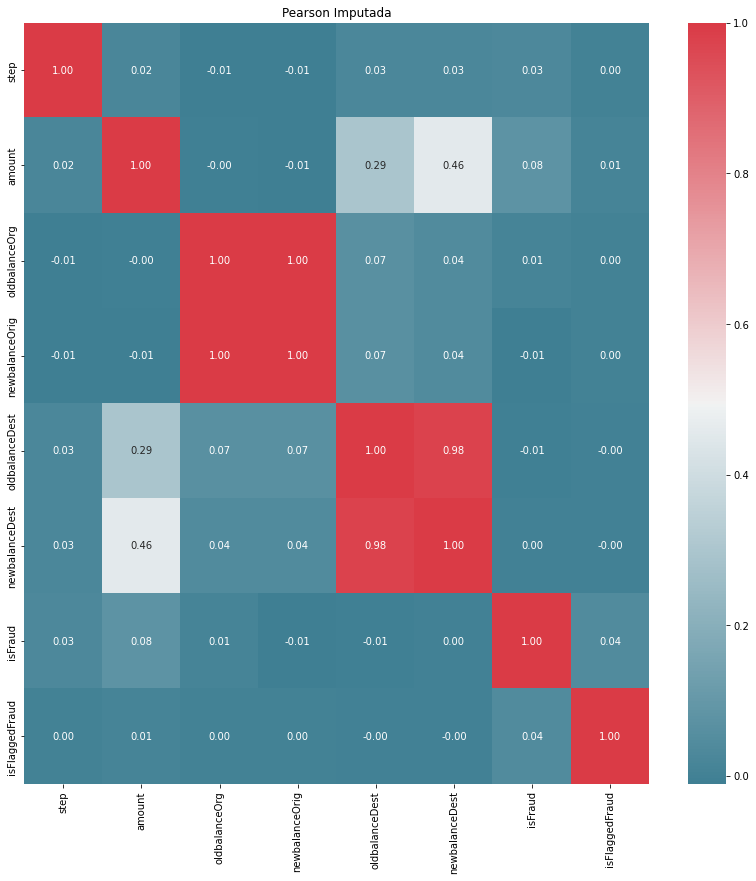

In [10]:
# Observamos la correlación cruzada entre las variables
fig, axes = plt.subplots(1,1,figsize=(14,14))

r = dataset.corr(method='pearson')
axes.set_title("Pearson Imputada")
sns.heatmap(r, cmap=sns.diverging_palette(220,10,as_cmap=True),annot=True,fmt=".2f",ax=axes)
sns.set(font_scale=0.9)

In [11]:
# Observamos que las variables de balance están altamente correlacionadas. Esto se explica porque el nuevo balance del destinatario
# es igual al balance anterior menos el monto de la transacción. Por lo tanto podemos quedarnos únicamente con los balances previos
# del originario y destinatario y el monto de la transacción:
dataset = dataset.drop(columns = {'oldbalanceOrg', 'oldbalanceDest'})

# Habíamos observado en el "head" que hay muchos datos faltantes, mostrados como cero, en las variables de balance de destinatario.


In [12]:
# transformamos la variable en numércia con el método One Hot Encoder
dataset = pd.get_dummies(dataset)
dataset.head(5)

,step,amount,newbalanceOrig,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,160296.36,0.0,0,0,0,0,0,1,0
1,1,1864.28,19384.72,0.0,0,0,0,0,0,1,0
2,1,181.00,0.00,0.0,1,0,0,0,0,0,1
3,1,181.00,0.00,0.0,1,0,0,1,0,0,0
4,1,11668.14,29885.86,0.0,0,0,0,0,0,1,0


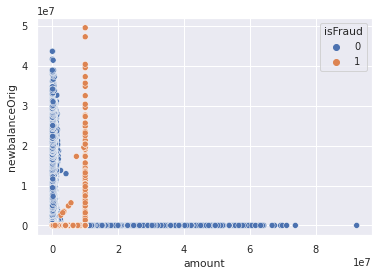

In [13]:
# Realizamos un gráfico sencillo para intuír la relación de las variables "amount" y "newbalanceOrig" con la posibilidad de fraude.
# Observamos que el monto de la transacción está correlacionado con la posibilidad de fraude.
sns.scatterplot(data=dataset, x="amount", y="newbalanceOrig", hue="isFraud")  

In [14]:
# Analizamos que proporción de fraudes hay en cada uno de los tipos de operación, para tener una idea si es una variable significativa:
cash_in = len(dataset[(dataset['type_CASH_IN'] == 1) & (dataset['isFraud'] == 1)])/ len(dataset[dataset['type_CASH_IN'] ==1])*100
cash_out = len(dataset[(dataset['type_CASH_OUT'] ==1) & (dataset['isFraud'] == 1)])/ len(dataset[dataset['type_CASH_OUT'] ==1])*100
debit = len(dataset[(dataset['type_DEBIT'] ==1) & (dataset['isFraud'] == 1)])/ len(dataset[dataset['type_DEBIT'] ==1])*100
payment = len(dataset[(dataset['type_PAYMENT'] ==1) & (dataset['isFraud'] == 1)])/ len(dataset[dataset['type_PAYMENT'] ==1])*100
transfer = len(dataset[(dataset['type_TRANSFER'] ==1) & (dataset['isFraud'] == 1)])/ len(dataset[dataset['type_TRANSFER'] ==1])*100
print('El porcentaje de fraudes cometidos con el tipo de pago Cash In es de {}'.format(cash_in))
print('El porcentaje de fraudes cometidos con el tipo de pago Cash Out es de {}'.format(cash_out))
print('El porcentaje de fraudes cometidos con el tipo de pago Debit es de {}'.format(debit))
print('El porcentaje de fraudes cometidos con el tipo de pago payment es de {}'.format(payment))
print('El porcentaje de fraudes cometidos con el tipo de pago transfer es de {}'.format(transfer))

# Observamos que la forma de pago Transfer es la mas habitual para fraudes, seguida por la forma Cash Out. Las otras formas de pago no registran fraudes.

El porcentaje de fraudes cometidos con el tipo de pago Cash In es de 0.0
El porcentaje de fraudes cometidos con el tipo de pago Cash Out es de 0.18395530726256984
El porcentaje de fraudes cometidos con el tipo de pago Debit es de 0.0
El porcentaje de fraudes cometidos con el tipo de pago payment es de 0.0
El porcentaje de fraudes cometidos con el tipo de pago transfer es de 0.7687991758442811


In [29]:
# Definimos la variable de salida:
X = dataset.drop(columns='isFraud')           
y = dataset['isFraud']    

# Dividimos el dataset en train y test previo a comenzar a implementar los modelos de machine learning. Dejamos muy pocos datos de testeo porque luego haremos 
# undersamplig
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=23)

print("X Train : ", X_train.shape)
print("X Test  : ", X_test.shape)
print("Y Train : ", y_train.shape)
print("Y Test  : ", y_test.shape)

X Train :  (5726358, 10)
X Test  :  (636262, 10)
Y Train :  (5726358,)
Y Test  :  (636262,)


## MODELO DE INFERENCIA DE LA VARIABLE DE SALIDA:
# RANDOM FOREST

##### Antes que nada se hace un "undersampling" para balancear las clases (hay muchos mas no-fraudes que fraudes), y, por otro lado, el dataset es muy grande y es una forma de trabajar con veolocidad aceptable para los recursos con los que contamos

In [30]:
# Hacemos el UndersSampler

undersampler=RandomUnderSampler(sampling_strategy= 'majority');

X_train_us,y_train_us=undersampler.fit_resample(X_train,y_train);

print('Cantidad de datos de entrenamiento:')
print(len(y_train_us))
print('Cantidad de datos de testeo:')
print(len(y_test))

print('\nClases train:')
print(y_train_us.value_counts(normalize=True))

print('\nClases test:')
print(y_test.value_counts(normalize=True))

Cantidad de datos de entrenamiento:
14704
Cantidad de datos de testeo:
636262

Clases train:
0    0.5
1    0.5
Name: isFraud, dtype: float64

Clases test:
0    0.998647
1    0.001353
Name: isFraud, dtype: float64


In [31]:
# Imoortamos la librería de Random Forest y las librerías de métricas
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score,plot_confusion_matrix,roc_auc_score, classification_report, confusion_matrix, precision_recall_curve, auc
# Instanciamos el modelo con 100 árboles de decisión
rf = RandomForestRegressor(n_estimators = 100, random_state = 5)
# Entrenamos el modelo con los datos de entrenamiento
rf.fit(X_train_us, y_train_us);

In [32]:
# Observamos las métricas que obtuvimos con este método:

y_pred=rf.predict(X_test)

errors = abs(y_pred - y_test)

# Mostrar las métricas de rendimiento
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Precision = 100 - 100*errors.sum()/len(errors)
print('Precisión:', round(Precision, 2), '%.')

Mean Absolute Error: 0.09 degrees.
Precisión: 90.88 %.


In [33]:
# Observamos una rama del árbol para analizar

#from sklearn.tree import export_graphviz
#import pydot
#import os
#os.environ["PATH"] += os.pathsep + 'C:/Users/Aulamultimedia/anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/graphviz'
#os.environ["PATH"] += os.pathsep + 'C:/Users/Aulamultimedia/anaconda3/pkgs/graphviz-2.38-hfd603c8_2/Library/bin/'
# Saca un árbol del bosque
#tree = rf.estimators_[10]
# Exportar la imagen a un archivo de puntos
df_list = list(X.columns)
#export_graphviz(tree, out_file = 'tree.dot', feature_names = df_list, rounded = True, precision = 1)
# Usamos dot file para crear el grafo
#(graph, ) = pydot.graph_from_dot_file('tree.dot')
# Escribir el gráfico en un archivo png
#graph.write_png('tree.png'); 
#print('La profundidad de este árbol es:', tree.tree_.max_depth)

# Ver el arbol en el archivo "tree.png"

In [34]:
# Analizamos la importancia de las variables

importances = list(rf.feature_importances_)
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(df_list, importances)]
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True) 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: newbalanceOrig       Importance: 0.22
Variable: newbalanceDest       Importance: 0.19
Variable: step                 Importance: 0.18
Variable: amount               Importance: 0.17
Variable: type_PAYMENT         Importance: 0.14
Variable: type_TRANSFER        Importance: 0.05
Variable: type_CASH_OUT        Importance: 0.04
Variable: isFlaggedFraud       Importance: 0.0
Variable: type_CASH_IN         Importance: 0.0
Variable: type_DEBIT           Importance: 0.0


Text(0.5, 1.0, ' Importancia de las variables')

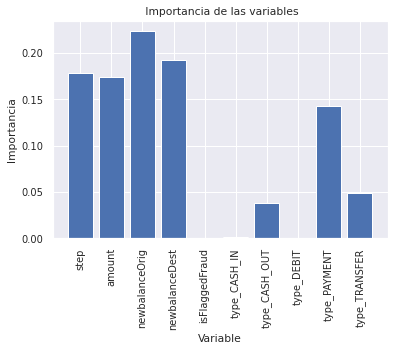

In [35]:
# Graficamos la importancia de las variables en la definición de la estimación
# lista de ubicaciones x para el gráfico
x_values = list(range(len(importances)))
# Hacer un gráfico de barras
plt.bar(x_values, importances, orientation = 'vertical')
# Etiquetas para el eje x
plt.xticks(x_values, df_list, rotation='vertical')
# Etiquetas y título de los ejes
plt.ylabel('Importancia'); plt.xlabel('Variable'); plt.title(' Importancia de las variables') 

## Principal Components Analysis

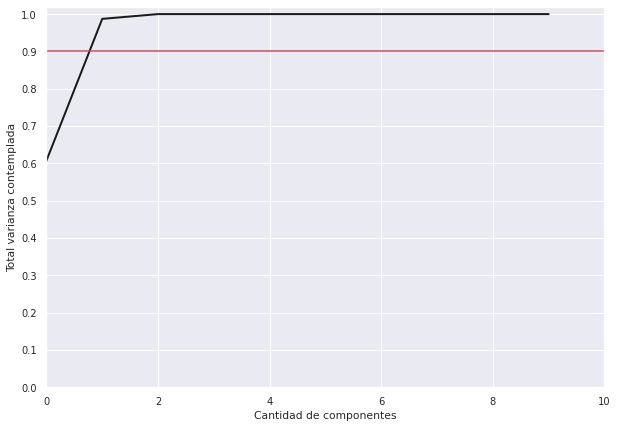

In [36]:
# Utilizamos PCA para reducir las dimensiones, para obtener únicamente dos features
from sklearn.decomposition import PCA
pca = PCA(n_components=10, random_state=5).fit(X)
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_), color='k', lw=2)
plt.xlabel('Cantidad de componentes')
plt.ylabel('Total varianza contemplada')
plt.xlim(0, 10)
plt.yticks(np.arange(0, 1.1, 0.1))
plt.axvline(63, c='b')
plt.axhline(0.9, c='r')
plt.show();


#### Esto significa que con una sola componente explicamos cerca del 99% de la varianza!

In [23]:
# Creamos un nuevo pca dos features
pca2 = PCA(n_components=2, random_state=5).fit(X)
x_pca2 = pca2.transform(X)

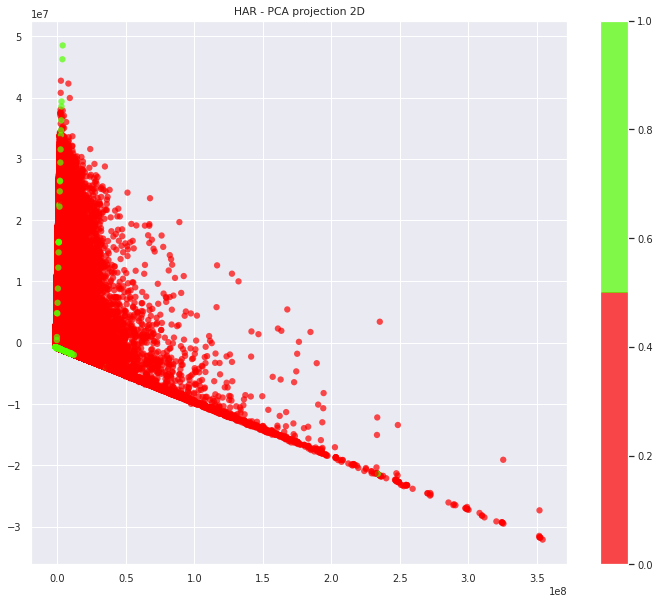

In [24]:
# Graficamos 
plt.figure(figsize=(12,10))
plt.scatter(x_pca2[:, 0], x_pca2[:, 1], c=y, edgecolor='none', alpha=0.7, s=40, cmap=plt.cm.get_cmap('prism', 2))
plt.colorbar()
plt.title('HAR - PCA projection 2D');

In [25]:
# Armamos un dataframe para facilitar la visualización
d = {'X': x_pca2[:, 0], 'y': y}
df = pd.DataFrame(data=d)

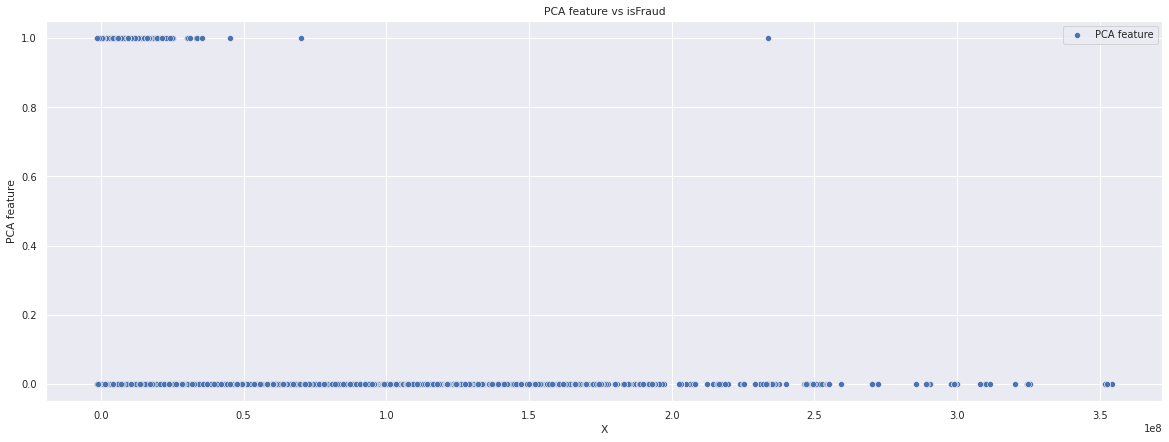

In [26]:
# hacemos plots para ver como se comporta la variable principal de PCA respecto a la salida
plt.figure(figsize=(20,7))
sns.scatterplot(data=df, x="X",y="y",label="PCA feature")
plt.ylabel("PCA feature")
plt.title("PCA feature vs isFraud")
plt.legend()
plt.show()

## SUPPORT VECTOR MACHINE no lineal

In [37]:
# Importamos las librerías que utilizaremos para este modelo
from sklearn.metrics import mean_absolute_error ,mean_squared_error, median_absolute_error,confusion_matrix,accuracy_score
from sklearn.svm import SVC 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [38]:
#Definimos el modelo para SVM lineal
svc_model = SVC(C=50,kernel="rbf")

# fit model
svc_model.fit(X_train_us,y_train_us)

y_pred_svc =svc_model.predict(X_test)

print("Score the X-train with Y-train is : ", svc_model.score(X_train_us,y_train_us))
print("Score the X-test  with Y-test  is : ", svc_model.score(X_test,y_test))
print(" Model Evaluation SVC : accuracy score " , accuracy_score(y_test,y_pred_svc))

Score the X-train with Y-train is :  0.7998503808487486
Score the X-test  with Y-test  is :  0.916144607095819
 Model Evaluation SVC : accuracy score  0.916144607095819


In [40]:
# Observamos que el modelo performa mejor con los valores de Test debido al desbalanceo de clases. Entonces probamos
# balancear los valores de testeo y volver a calcular el Accuracy:
X_test_us,y_test_us=undersampler.fit_resample(X_test,y_test);

print('Cantidad de datos de testeo:')
print(len(y_test_us))

print('\nClases test:')
print(y_test_us.value_counts(normalize=True))

y_pred_svc_us =svc_model.predict(X_test_us)
print("Score the X-test undersampled  with Y-test  is : ", svc_model.score(X_test_us,y_test_us))
print(" Model Evaluation SVC : accuracy score " , accuracy_score(y_test_us,y_pred_svc_us))

Cantidad de datos de testeo:
1722

Clases test:
0    0.5
1    0.5
Name: isFraud, dtype: float64
Score the X-test undersampled  with Y-test  is :  0.7984901277584204
 Model Evaluation SVC : accuracy score  0.7984901277584204


In [ ]:
# Observamos que el Accuracy sobre los datos de testeo son levemente menores que el parámetro del set de entrenamiento.
# Esto implica que el modelo no sobre-ajusta y el parámetro está bien estimado. Sin embargo la performance de este modelo no es buena, en comparación
# con el model de random forest.

